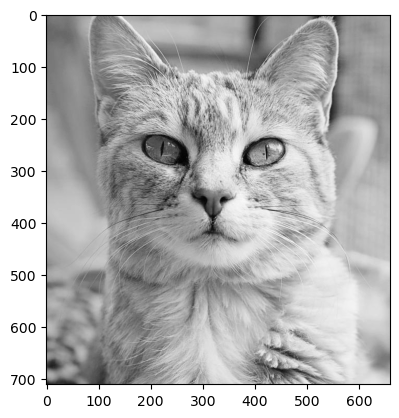

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

img = Image.open('cat.jpg').convert('L')
img = np.array(img)
plt.imshow(img, 'gray')

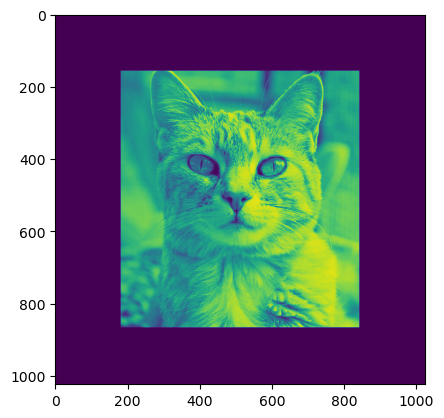

In [2]:
input = np.zeros((1024,1024))
input[512-img.shape[0]//2 : 512+img.shape[0]//2, 512-img.shape[1]//2 : 512+img.shape[1]//2] = img
plt.imshow(input)

In [3]:
m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

lam = 532 * nm
z = 1 * m

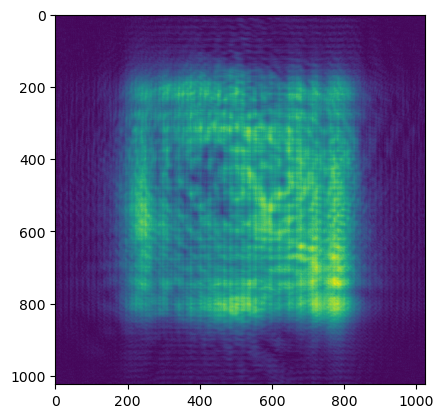

In [5]:
input_fourier = np.fft.fftshift(np.fft.fft2(input))

Dx = 1*cm
Dy = 1*cm

dx = Dx/input.shape[0]
dy = Dy/input.shape[1]

dfx = 1/Dx
dfy = 1/Dy
# prepare frequency grid and calculate transfer function
fx = np.arange(-512, 512) * dfx
fy = np.arange(-512, 512) * dfy
FX, FY = np.meshgrid(fx, fy)
transfer = np.exp(-1j * np.pi * lam * z * (FX**2 + FY**2))

# Apply
output_fourier = input_fourier * transfer
cat_output = np.fft.ifft2(output_fourier)

# Normalization
cat_output = cat_output / np.abs(cat_output).max()
plt.imshow(np.abs(cat_output))

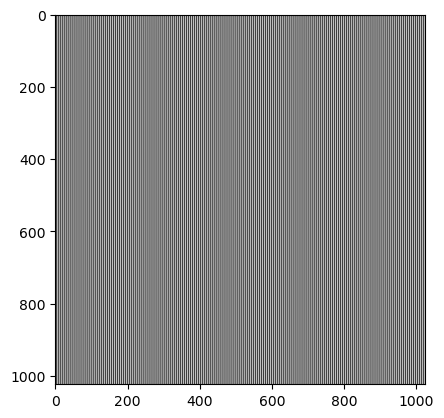

In [6]:
# oblique plane wave
theta = np.pi/6

x = np.arange(-512, 512) * dx
y = np.arange(-512, 512) * dy
X, Y = np.meshgrid(x, y)

oblique = np.exp(1j*2*np.pi/lam * X * np.sin(theta))
plt.imshow(np.real(oblique), 'gray')

In [7]:
intensity = np.square(np.abs(cat_output + oblique))

recon = oblique * intensity
recon_fourier = np.fft.fft2(recon)
recon_fourier[0:400,:]=0
recon_fourier[600:1024,:]=0

zz = widgets.FloatSlider(min=0.0,max=1,step=0.001)
def plot_recon(z):

    recon = np.exp(1j*2*np.pi/lam * z * np.cos(theta)) * oblique * intensity
    recon_fourier = np.fft.fft2(recon)
    recon_fourier[0:400,:]=0
    recon_fourier[600:1024,:]=0

    transfer = np.exp(-1j * np.pi * lam * (-z) * (FX**2 + FY**2))

    recon_output_fourier = recon_fourier * transfer
    recon_output = np.fft.ifft2(recon_output_fourier)
    plt.imshow(np.abs(recon_output), 'gray')

widgets.interact(plot_recon, z=zz)

interactive(children=(FloatSlider(value=0.0, description='z', max=1.0, step=0.001), Output()), _dom_classes=('…

<function __main__.plot_recon(z)>